In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import pickle

In [2]:
'''
This function generates the training and testing dataset to be used for training and testing purposes with various models respectively. 
'''


def generate_train_test_data(split = 0.2, random_state = 42, scaling = 'standard', sampling = True, show_plots = True):

	'''
	This method generates the training and test data. 
	Parameters :- split : Float, (0,1) - fraction of size of testing data to be used to test the model.
				  random_state : Integer - state of the randomization of the sampling data.
				  scaling : String, 'normal_negative', 'normal_positive', 'standard' - Type of scaling to be used, scaling data by 
				  																		[-1,1], [0,1], Standard Normal respectively
				  sampling : Boolean - To generate synthetic data using training data with SMOTE
				  show_plots : Boolean - To show target variable distribution after each sampling method.											
	'''

	data = pd.read_csv('../extracted_datasets/raw.csv', index_col = [0])

	X = data[data.columns[0:100]]
    
	y = data['y']
    
	sns.countplot(y).set_title('Target Distribution in whole dataset')
	plt.show()
    
	if sampling == True:
		oversample = SMOTE()
		X, y = oversample.fit_resample(X, y)

	X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, stratify = y, test_size = split)


	if scaling == 'normal_negative':
		scale = MinMaxScaler(feature_range = (-1,1))

	elif scaling == 'normal_positive':
		scale = MinMaxScaler()

	elif scaling == 'standard':
		scale = StandardScaler()

# 	if sampling == False:

	X_train = scale.fit_transform(X_train)
	X_test = scale.transform(X_test)

	if show_plots == True:
		sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset')
		plt.show()
		sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
		plt.show()

	return X_train, X_test, y_train, y_test

# 	else:

# 		if show_plots == True:
# 			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset without SMOTE')
# 			plt.show()

# 		oversample = SMOTE()
# 		X_train, y_train = oversample.fit_resample(X_train, y_train)

# 		X_train = scale.fit_transform(X_train)
# 		X_test = scale.transform(X_test)

# 		if show_plots == True:
# 			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset with SMOTE')
# 			plt.show()
# 			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
# 			plt.show()
# 		return X_train, X_test, y_train, y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


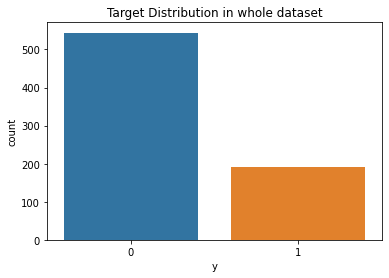

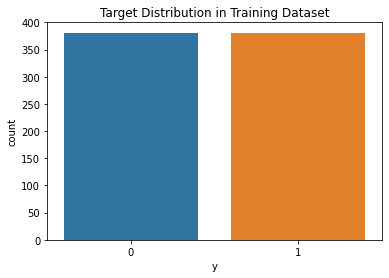

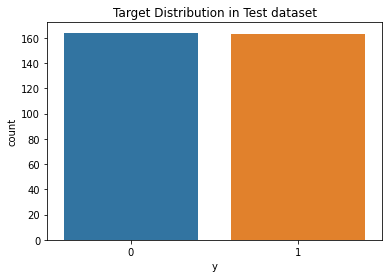

In [3]:
X_train, X_test, y_train, y_test = generate_train_test_data(split = 0.3,sampling = True)

In [ ]:
# pickle.dump(X_train,open('X_train','wb'))
# pickle.dump(y_train,open('y_train','wb'))
# pickle.dump(X_test,open('X_test','wb'))
# pickle.dump(y_test,open('y_test','wb'))

In [ ]:
# with open("X_train", "br") as fh:
#     X_train = pickle.load(fh)

# with open("y_train", "br") as fh:
#     y_train = pickle.load(fh)

# with open("X_test", "br") as fh:
#     X_test = pickle.load(fh)

# with open("y_test", "br") as fh:
#     y_test = pickle.load(fh)



In [4]:
sel = SelectKBest(f_classif, k=95)
X_train = sel.fit_transform(X_train, y_train)
X_test = sel.transform(X_test)

pca = PCA(n_components=70)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
pickle.dump(X_train,open("X_train_fs","wb"))
pickle.dump(X_test,open("X_test_fs","wb"))
pickle.dump(y_train, open("y_train", "wb"))
pickle.dump(y_test, open("y_test", "wb"))

In [ ]:
X_train.shape

In [6]:
with open("../Saved_Files/Train_Test_Data/X_train_fs", "br") as fh:
    X_train = pickle.load(fh)

with open("../Saved_Files/Train_Test_Data/y_train", "br") as fh:
    y_train = pickle.load(fh)
    
with open("../Saved_Files/Train_Test_Data/X_test_fs", "br") as fh:
     X_test = pickle.load(fh)
        
with open("../Saved_Files/Train_Test_Data/y_test", "br") as fh:
    y_test = pickle.load(fh)

# Model Training


In [23]:
#Logistic Regression
param_grid = {'penalty': ['l2'],
           'C': [1],
           'max_iter': [1000],'random_state':[0]
           }
scoring = ['roc_auc', 'accuracy']
grid = GridSearchCV(LogisticRegression(), param_grid, scoring = scoring, verbose  = 1,refit = 'roc_auc')  
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.best_params_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_test,y_test)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_test, grid.predict(X_test),average='binary'))
lr = grid.best_estimator_
filename = 'finalized_lr.sav'
pickle.dump(lr, open(filename, 'wb'))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Params: 
{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}

Training Accuracy: 
0.867260671363448

Test Accuracy
0.7860990573095915

Precision, Recall, F1: 
(0.6831683168316832, 0.8466257668711656, 0.7561643835616438, None)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [ ]:
grid.best_params_

In [ ]:
lr = LogisticRegression()

In [ ]:
y_pred_lr = grid.predict(X_val)
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm = confusion_matrix(y_val, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',fontsize = 50, color='red')
plt.show()

print(classification_report(y_val, y_pred_lr))



In [ ]:
y_pred_proba = grid.predict_proba(X_val)[::,1]
fpr, tpr, _ = roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
#Random Forest Tree
from sklearn.ensemble import RandomForestClassifier

print('start')
param_grid = {'n_estimators': [360],
           'criterion': ['gini'],
              'max_depth': [19],
              'min_samples_split': [2],
              'max_features': ['auto'],
              'random_state':[0]
            
           }
scoring = ['accuracy', 'roc_auc']
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose = 1, scoring = scoring, refit='roc_auc') 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.best_params_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_test,y_test)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_test, grid.predict(X_test),average='binary'))
random_forrest = grid.best_estimator_
filename = 'finalized_rf.sav'
pickle.dump(random_forrest, open(filename, 'wb'))

start
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished



Best Params: 
{'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 360, 'random_state': 0}

Training Accuracy: 
0.9999999999999999

Test Accuracy
0.939473290438426

Precision, Recall, F1: 
(0.8333333333333334, 0.8895705521472392, 0.8605341246290802, None)


In [ ]:
grid.best_params_

In [39]:
#SVM
print('start')
from sklearn.svm import SVC
param_grid = {'C': [1],  
              'gamma': [1], 
              'kernel': ['rbf'],
              'probability' : [True]
           }
scoring = ['roc_auc', 'accuracy']
grid = GridSearchCV(SVC(), param_grid, scoring = scoring, verbose = 1, refit='roc_auc') 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.best_params_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_test,y_test)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_test, grid.predict(X_test),average='binary'))
support_vector = grid.best_estimator_
filename = 'finalized_svm.sav'
pickle.dump(support_vector, open(filename, 'wb'))

start
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished



Best Params: 
{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'probability': True}

Training Accuracy: 
0.9997651609338306

Test Accuracy
0.937490647912614

Precision, Recall, F1: 
(0.8679245283018868, 0.8466257668711656, 0.8571428571428571, None)


In [38]:
#ADABOOST
print('start')
from sklearn.ensemble import AdaBoostClassifier
param_grid = {
              'algorithm' : ['SAMME.R'],
              'learning_rate' : [0.001],
              'n_estimators' : [10],
              'random_state' : [0]
           }
scoring = ['roc_auc', 'accuracy']
grid = GridSearchCV(AdaBoostClassifier(), param_grid, verbose = 1, refit='roc_auc', scoring = scoring) 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_test,y_test)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_test, grid.predict(X_test),average='binary'))
adaboost = grid.best_estimator_
filename = 'finalized_adaboost.sav'
pickle.dump(adaboost, open(filename, 'wb'))

start
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Params: 
{'mean_fit_time': array([0.05781841]), 'std_fit_time': array([0.00524488]), 'mean_score_time': array([0.00561895]), 'std_score_time': array([0.00119897]), 'param_algorithm': masked_array(data=['SAMME.R'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.001],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_random_state': masked_array(data=[0],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 10, 'random_state': 0}], 'split0_test_roc_auc': array([0.67797334]), 'split1_test_roc_auc': array([0.59210526]), 'split2_test_roc_auc': array([0.59868421]), 'split3_test_roc_auc': array([0.61842105]), 'split4_test_roc_auc': array([0.58552632]), 'mean_test

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [29]:
#GBoost
from sklearn.ensemble import GradientBoostingClassifier
print('start')
from sklearn.svm import SVC
param_grid = {'n_estimators': [300],
              'criterion': ['friedman_mse'],
              'max_features': ['auto'],
              'learning_rate': [0.001],
              'loss': ['deviance'],
              'random_state': [0]
           }
scoring = ['roc_auc', 'accuracy']
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, verbose = 1, scoring = scoring, refit='roc_auc') 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.cv_results_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_test,y_test)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_test, grid.predict(X_test),average='binary'))
gbboost = grid.best_estimator_
filename = 'finalized_gbboost.sav'
pickle.dump(gbboost, open(filename, 'wb'))

start
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.4s finished



Best Params: 
{'mean_fit_time': array([2.68601165]), 'std_fit_time': array([0.06906499]), 'mean_score_time': array([0.00265989]), 'std_score_time': array([0.00010584]), 'param_criterion': masked_array(data=['friedman_mse'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.001],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_loss': masked_array(data=['deviance'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[300],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_random_state': masked_array(data=[0],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'friedman_mse', 'learning_rate': 0.001, 'loss': 'd

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

print('start')
from sklearn.svm import SVC
param_grid = {'hidden_layer_sizes': [(64)],
              'batch_size': [32],
              'learning_rate_init': [0.01],
              'learning_rate': ['constant'],
              'max_iter' : [1000],
              'alpha' : [0.0001],
              'random_state': [0]
           }
scoring = ['roc_auc', 'accuracy']
grid = GridSearchCV(MLPClassifier(), param_grid, scoring = scoring, verbose = 1, refit = "roc_auc") 
grid.fit(X_train, y_train)

print('\nBest Params: ')
print(grid.best_params_)

print('\nTraining Accuracy: ')
print(grid.score(X_train,y_train)) #train score

print('\nTest Accuracy')
print(grid.score(X_test,y_test)) #test_score

print('\nPrecision, Recall, F1: ')
print(precision_recall_fscore_support(y_test, grid.predict(X_test),average='binary'))
mlp = grid.best_estimator_
filename = 'finalized_mlp.sav'
pickle.dump(mlp, open(filename, 'wb'))

start
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished



Best Params: 
{'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': 64, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 1000, 'random_state': 0}

Training Accuracy: 
1.0

Test Accuracy
0.9189735148885231

Precision, Recall, F1: 
(0.8118279569892473, 0.9263803680981595, 0.8653295128939827, None)
